In [1]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.SVCDSeg.SVCD import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [19]:
KEA_IMAGE_PATH = r"data\demoPascal\2007_000243.jpg"
KEA_SCRIBBLE_PATH = r".\data\demoPascal\2007_000243.xml"
# KEA_IMAGE_PATH = r".\data\demoPascal\2010_005258.jpg"
# KEA_SCRIBBLE_PATH = r".\data\demoPascal\2010_005258.xml"


In [20]:
sample_image_kea = TargetImage(
    KEA_IMAGE_PATH
)
sample_scribble_kea = EncodedScribble(
    KEA_SCRIBBLE_PATH,
)

In [21]:
n_classes = sample_scribble_kea.get_n_classes()

In [43]:
segmenter = SVCDSeg(
    n_classes,
    max_iter = 1000,
    debug = 0,
    lambda_ = 8e-3,
    #tau_dual = 0.5 
)

In [40]:
fitted_segmentation = segmenter.fit(
    sample_image_kea,
    sample_scribble_kea
)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 15.89it/s]


C:\Users\lollo\AppData\Local\Temp\ipykernel_8876\1327697119.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


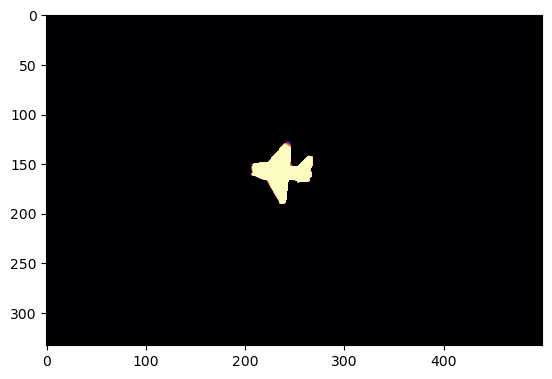

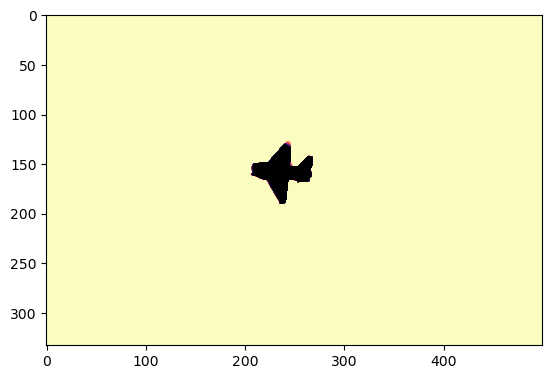

In [41]:
for class_theta in segmenter.theta_t1:
    final_segmentation = class_theta.transpose(1, 0)
    fig, ax = plt.subplots()
    im1 = ax.imshow(final_segmentation, cmap='magma', alpha=1.0)
    fig.show()

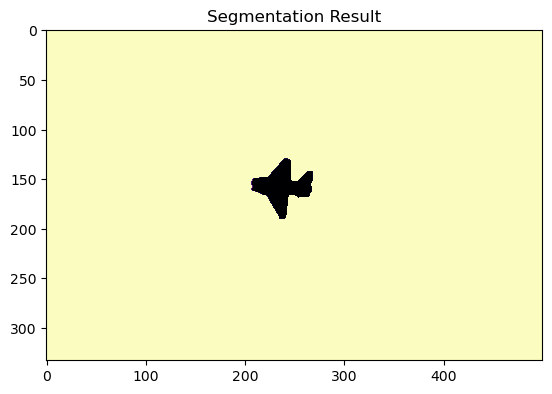

In [42]:
final_segmentation = np.argmax(segmenter.theta_t1, axis = 0).transpose(1, 0)

fig, ax = plt.subplots()

im1 = ax.imshow(final_segmentation, cmap='magma', alpha=1.0)
ax.set_title("Segmentation Result")
fig.savefig("./plots/plane/segmentation_result.png")


In [37]:
segmenter.primal_energy_history[-1] - segmenter.dual_energy_history[-1]

-0.008324142135641921

In [27]:
segmenter.xi.shape

(2, 2, 500, 333)

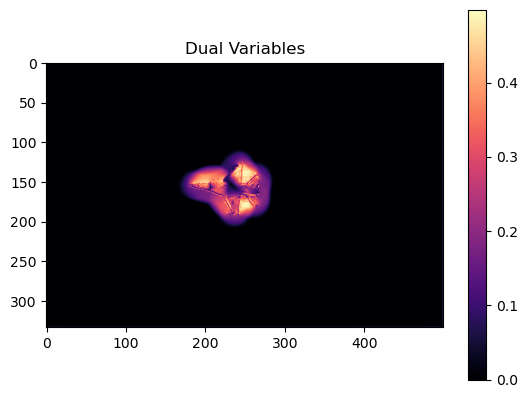

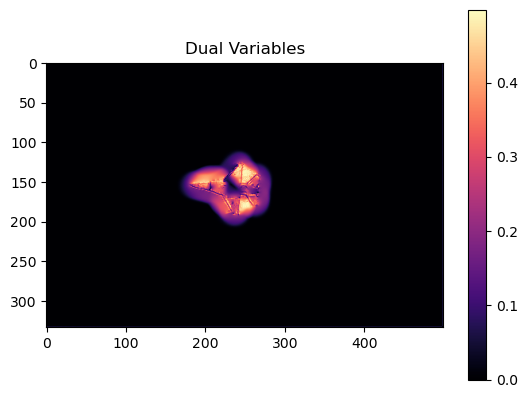

In [28]:
for class_ in range(segmenter.xi.shape[1]):
    xi = segmenter.xi[:, class_, :, :]
    fig, ax = plt.subplots()
    dual_vars = np.sum(xi**2, axis = 0)
    dual_vars = np.sqrt(dual_vars).transpose(1, 0)
    #dual_vars = np.mean(dual_vars, axis = 2)

    vmin = np.min(dual_vars)
    vmax = np.max(dual_vars)

    im1 = ax.imshow(dual_vars, cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    ax.set_title("Dual Variables")
    fig.colorbar(im1, ax=ax, label='')
    fig.savefig(f"./plots/plane/dual_variables_{class_}.png")



In [29]:
segmenter.dual_energy_history[-1] - segmenter.primal_energy_history[-1]

-3.928224480757194

C:\Users\lollo\AppData\Local\Temp\ipykernel_8876\2323964755.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


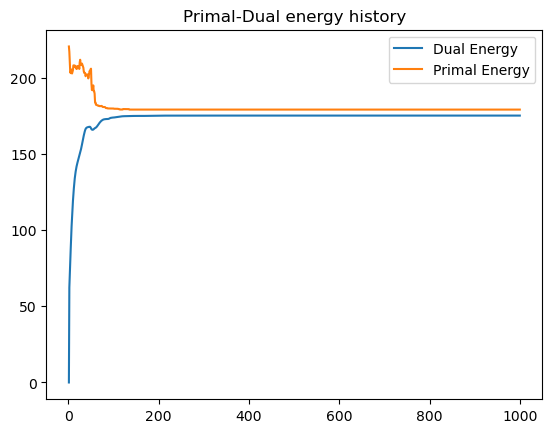

In [30]:
fig, ax = plt.subplots()

im_dual = ax.plot(segmenter.dual_energy_history, label = "Dual Energy")
im_primal = ax.plot(segmenter.primal_energy_history, label = "Primal Energy")
ax.set_title("Primal-Dual energy history")
ax.legend()
fig.show()
fig.savefig("./plots/plane/energy_history.png")


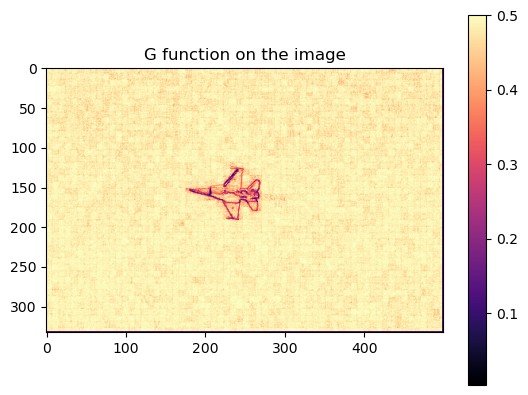

In [31]:
im_arr = sample_image_kea.get_image_array()
im_shape = sample_image_kea.get_image_shape()
segmenter.utils.make_derivative_matrix(*im_shape[1::-1])
#half_g = segmenter.utils.init_halfg(im_arr)
half_g = segmenter.halfg
_, w, h = half_g.shape
half_g = half_g.reshape(w, h)
half_g.shape
vmin = np.min(half_g)
vmax = np.max(half_g)

fig, ax = plt.subplots()

im1 = ax.imshow(half_g.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
ax.set_title("G function on the image")
fig.colorbar(im1, ax=ax, label='')
fig.savefig("./plots/plane/GFunction.png")

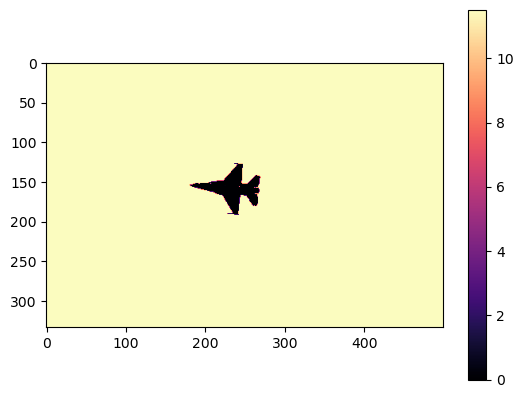

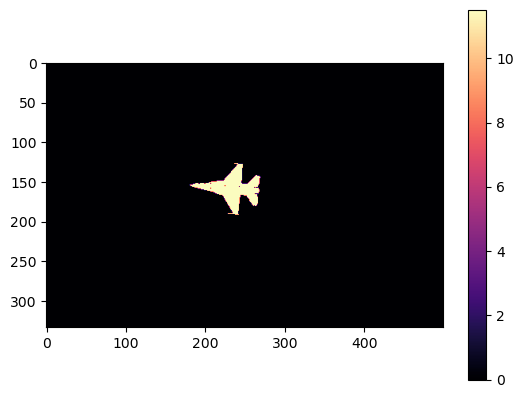

In [32]:
for idx, likelihood in enumerate(segmenter.fitted_likelihood):
    fig, ax = plt.subplots()
    vmin = np.min(likelihood)
    vmax = np.max(likelihood)
    im1 = ax.imshow(likelihood.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    fig.colorbar(im1, ax=ax, label='')
    fig.savefig(f"./plots/plane/likelihood_{idx}.png")
    

In [45]:
import os

In [46]:
os.listdir("data\demoPascal")

['2007_000032.jpg',
 '2007_000032.xml',
 '2007_000063.jpg',
 '2007_000063.xml',
 '2007_000068.jpg',
 '2007_000068.xml',
 '2007_000175.jpg',
 '2007_000175.xml',
 '2007_000243.jpg',
 '2007_000243.xml',
 '2007_000346.jpg',
 '2007_000346.xml',
 '2008_003147.jpg',
 '2008_003147.xml',
 '2010_005258.jpg',
 '2010_005258.xml']